## Подготовительная работа
* [Installing a Library Permanently in Colab](https://saturncloud.io/blog/how-to-install-a-library-permanently-in-colab/)

In [1]:
## connect google drive
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install virtualenv
!virtualenv /content/drive/MyDrive/vkr/kmu/virtual_env

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 40.3 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 31095ms
  creator CPython3Posix(dest=/content/drive/MyDrive/vkr/kmu/virtual_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: Cython==3.0.10, Jinja2==3.1.3, MarkupSafe==2.1.5, affine==2.4.0, attrs==23.2.0, blosc2==2.6.1, certifi==2024.2.2, charset_normalizer==3.3.2, click==8.1.7, click_plugins==1.1.1, cligj==0.7.2, contextily==1.6.0, contourpy==1.2.0, cycler==0.12.1, cykhash==2.0.1, fiona==1.9.6, fonttools==4.50.0, geographiclib==2.0, geopandas==0.14.3, geopy==2.4.1, idna==3.6, joblib==1.3.2, kiwisolver==1.4.5, mapclassify==2.6.1, matplotlib==3.8.3, mercantile==1.2.1, msgpack==1.0.8, ndindex==1.8, networkx==3.

In [3]:
import sys


venv_path = "/content/drive/MyDrive/vkr/kmu/virtual_env/lib/python3.10/site-packages"
if venv_path not in sys.path:
  # add the path of the virtual environment site-packages to colab system path
  sys.path.append(venv_path)
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/vkr/kmu/virtual_env/lib/python3.10/site-packages']

## Pandana

```bash
!source /content/drive/MyDrive/vkr/kmu/virtual_env/bin/activate; pip install pyrosm contextily mapclassify osmnx pandana
```

In [ ]:
!source /content/drive/MyDrive/vkr/kmu/virtual_env/bin/activate; pip install pandana

In [ ]:
!pip freeze

### Конфигурация

In [116]:
DIR_OSM = '/content/drive/MyDrive/vkr/kmu/src/osm/'
CITY = 'SanktPetersburg'
BBOX = [30.2561753, 59.929385, 30.3637657, 59.9832816]
UTM_ZONE = 32636
MAP_DIST = 50
MAX_DIST = 500
MAX_ITEMS = 10

config = {
    'dir_osm': DIR_OSM,
    'city': CITY,
    'crs': UTM_ZONE,
    'filters': {
        'buildings': {
            'all': {
                'building': True
            },
            'residential_only': {
                'building': [
                'apartments',
                'residential'
              ]
            }
        },
        'POIs': {
            'shop': [
                'convenience',
                'supermarket',
                'mall',
                'greengrocer'
            ],
            'amenity': [
                'pharmacy',
                'school',
                'kindergarten',
                'clinic'
            ],
            'healthcare': [
                'clinic'
            ]
        },
        'network_type': [
            'walking',
            'driving'
        ]
    },
    'bbox': BBOX,
    'map_dist': MAP_DIST,
    'max_dist': MAX_DIST,
    'max_items': MAX_ITEMS
}

### Логирование

<details>
<summary> Log levels</summary>

```py
logging.debug("A DEBUG Message")
logging.info("An INFO")
logging.warning("A WARNING")
logging.error("An ERROR")
logging.critical("A message of CRITICAL severity")
```
</details>

In [ ]:
!pwd

/content


In [117]:
import logging


logger = logging.getLogger()
fhandler = logging.FileHandler(filename=config["dir_osm"]+'obj_assessment.log', mode='w')
logger.addHandler(fhandler)
logger.setLevel(logging.INFO)

### Загрузка подготовленных данных

In [238]:
from geopandas import read_file


fp = ''
network_type = config['filters']['network_type'][0]
#network_type = config['filters']['network_type'][1]

if 'bbox' in config:
  fp = DIR_OSM + 'spb_bbox.gpkg'

  # buildings
  buildings = read_file(fp, layer='buildings')
  if buildings.crs is None:
     logger.info(f'buildings crs is None')

  # pois
  pois = read_file(fp, layer='pois').set_index('id')
  if pois.crs is None:
     logger.info(f'pois crs is None')

  # graph
  nodes = read_file(fp, layer=f'{network_type}_nodes').set_index('id')
  edges = read_file(fp, layer=f'{network_type}_edges')
  if nodes.crs is None:
     logger.info(f'graph crs is None')

  logger.info(f'read buildings/pois/{network_type}_graph from {fp}')

else:
  fp = DIR_OSM + 'spb.gpkg'

  # buildings
  buildings = read_file(fp, layer='buildings')
  if buildings.crs is None:
     logger.info(f'buildings crs is None')

  # pois
  pois = read_file(fp, layer='pois').set_index('id')
  if pois.crs is None:
     logger.info(f'pois crs is None')

  # graph
  nodes = read_file(fp, layer=f'{network_type}_nodes').set_index('id')
  edges = read_file(fp, layer=f'{network_type}_edges')
  if nodes.crs is None:
     logger.info(f'graph crs is None')

  logger.info(f'read buildings/pois/{network_type}_graph from {fp}')


INFO:root:read buildings/pois/walking_graph from /content/drive/MyDrive/vkr/kmu/src/osm/spb_bbox.gpkg


In [239]:
buildings.head(2)

,id,building,centroid_x,centroid_y,geometry
0,16960662,apartments,346952.030481,6.648785e+06,"POLYGON ((346938.573 6648792.461, 346950.029 6..."
1,17063465,apartments,346792.083845,6.649158e+06,"POLYGON ((346796.010 6649130.969, 346780.855 6..."


In [240]:
pois.head(2)

,pois,centroid_x,centroid_y,geometry
id,,,,
332263460,supermarket,350111.535453,6.650154e+06,POINT (350111.535 6650153.889)
339394777,pharmacy,349698.538406,6.649758e+06,POINT (349698.538 6649757.709)


In [241]:
nodes.head(2)

,x,y,geometry
id,,,
10240355599,350768.977867,6.647817e+06,POINT (350768.978 6647816.641)
1591433310,350772.206656,6.647831e+06,POINT (350772.207 6647830.545)


In [242]:
edges.head(2)

,u,v,length,oneway,highway,geometry
0,10240355599,1591433310,14.247,no,unclassified,"LINESTRING (350768.978 6647816.641, 350769.630..."
1,1591433310,9296451194,24.230,no,unclassified,"LINESTRING (350772.207 6647830.545, 350777.960..."


In [243]:
shops = pois[pois.pois.isin(config['filters']['POIs']['shop'])]
pharmacies = pois[pois.pois == 'pharmacy']
clinics = pois[pois.pois == 'clinic']
schools = pois[pois.pois == 'school']
kindergarten = pois[pois.pois == 'kindergarten']
logger.info(f'divide pois on categories')

INFO:root:divide pois on categories


### Pandana network

In [244]:
import pandana


is_twoway = True
if network_type == 'driving':
  is_twoway = False

pandana_network = pandana.Network(
    node_x=nodes.x,
    node_y=nodes.y,
    edge_from=edges.u,
    edge_to=edges.v,
    edge_weights=edges[['length']],
    twoway=is_twoway
    )

logger.info(f'create pandana {network_type} network')

INFO:root:create pandana walking network


### Accessibility

In [245]:
def get_nodes(obj, category, map_dist=50):
  node_id = pandana_network.get_node_ids(
    x_col=obj.centroid_x,
    y_col=obj.centroid_y,
    mapping_distance=map_dist
    )
  logger.info(f'map {category} centroids and nodes of {network_type} network')
  return node_id
  #return node_id.astype(int, copy=True)

In [246]:
buildings['node_id'] = get_nodes(buildings, 'buildings', config['map_dist'])
shops['node_id'] = get_nodes(shops, 'shops', config['map_dist'])
pharmacies['node_id'] = get_nodes(pharmacies, 'pharmacies', config['map_dist'])
clinics['node_id'] = get_nodes(clinics, 'clinics', config['map_dist'])
schools['node_id'] = get_nodes(schools, 'schools', config['map_dist'])
kindergarten['node_id'] = get_nodes(kindergarten, 'kindergarten', config['map_dist'])

INFO:root:map buildings centroids and nodes of walking network
INFO:root:map shops centroids and nodes of walking network
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
INFO:root:map pharmacies centroids and nodes of walking network
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
INFO:root:map clinics cent

In [247]:
buildings = buildings.dropna(subset=["node_id"])
shops = shops.dropna(subset=["node_id"])
pharmacies = pharmacies.dropna(subset=["node_id"])
clinics = clinics.dropna(subset=["node_id"])
schools = schools.dropna(subset=["node_id"])
kindergarten = kindergarten.dropna(subset=["node_id"])

logger.info(f'drop unmapped buildings and pois')

INFO:root:drop unmapped buildings and pois


<ipython-input-367-f84ea728bde4>:13: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
INFO:root:save map buildings to /content/drive/MyDrive/vkr/kmu/src/osm/images/map_buildings_centroids_and_nodes_of_walking_network.png


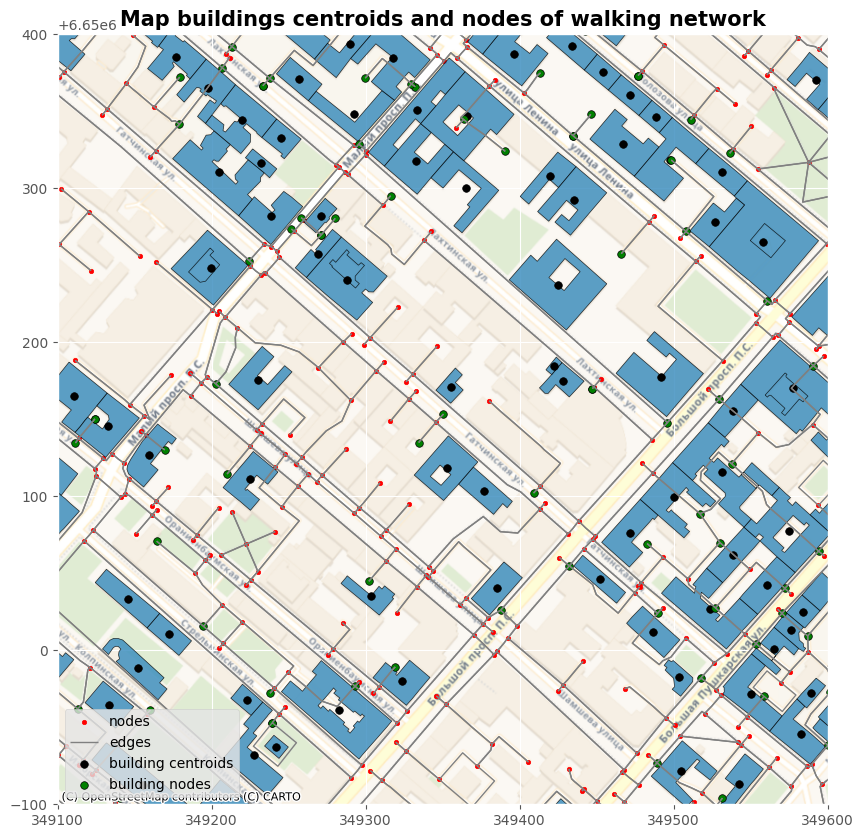

In [367]:
import contextily as cx
from matplotlib import pyplot as plt


with plt.style.context("ggplot"):
  ax = nodes.plot(figsize=(20, 10), label='nodes', color='red', markersize=10, alpha=1)
  ax = edges.plot(ax=ax, label='edges', color='gray', linewidth=1, alpha=1)

  ax = buildings.plot(ax=ax, label='buildings', edgecolor='black', alpha=0.8)
  ax = buildings.centroid.plot(ax=ax, label='building centroids', color='black', edgecolor='black', markersize=30)
  ax = nodes.loc[buildings.node_id.astype(int)].plot(ax=ax, label='building nodes', color='green', edgecolor='black', markersize=30)
  plt.setp(ax, xlim=(349100, 349600), ylim=(6649900, 6650400))
  plt.legend()
  cx.add_basemap(ax=ax, crs=buildings.crs.to_string(), source=cx.providers.CartoDB.Voyager)
  ax.set_title(f'Map buildings centroids and nodes of {network_type} network', fontsize=15, fontweight='bold')
  fp = config['dir_osm']+f'images/map_buildings_centroids_and_nodes_of_{network_type}_network.png'
  plt.savefig(fp)
  logger.info(f'save map buildings to {fp}')
  plt.show()

In [249]:
pandana_network.set(node_ids=buildings['node_id'], name='buildings')
pandana_network.set(node_ids=shops['node_id'], name='shops')
pandana_network.set(node_ids=pharmacies['node_id'], name='pharmacies')
pandana_network.set(node_ids=clinics['node_id'], name='clinics')
pandana_network.set(node_ids=schools['node_id'], name='schools')
pandana_network.set(node_ids=kindergarten['node_id'], name='kindergarten')

logger.info(f'set variable_name to node groups')

INFO:root:set variable_name to node groups


In [250]:
pandana_network.variable_names

{'buildings', 'clinics', 'kindergarten', 'pharmacies', 'schools', 'shops'}

In [251]:
def calculate_accessibility(dist, aggr_type, name):
  accessibility = pandana_network.aggregate(
    distance=dist,
    type=aggr_type,
    decay='flat',
    imp_name=None,
    name=name,
    )
  logger.info(f'calculate amount of {name} within {dist}m')
  return accessibility

In [252]:
shops_access = calculate_accessibility(dist=500, aggr_type='count', name='shops')
pharmacies_access = calculate_accessibility(dist=500, aggr_type='count', name='pharmacies')
clinics_access = calculate_accessibility(dist=500, aggr_type='count', name='clinics')
schools_access = calculate_accessibility(dist=500, aggr_type='count', name='schools')
kindergarten_access = calculate_accessibility(dist=500, aggr_type='count', name='kindergarten')

INFO:root:calculate amount of shops within 500m
INFO:root:calculate amount of pharmacies within 500m
INFO:root:calculate amount of clinics within 500m
INFO:root:calculate amount of schools within 500m
INFO:root:calculate amount of kindergarten within 500m


In [253]:
shops_access.head(2)

id
10240355599    4.0
1591433310     4.0
dtype: float64

In [254]:
shops_access.name = 'shops_access'
pharmacies_access.name = 'pharmacies_access'
clinics_access.name = 'clinics_access'
schools_access.name = 'schools_access'
kindergarten_access.name = 'kindergarten_access'

In [255]:
shops_access_norm = (shops_access - shops_access.min()) / (shops_access.max() - shops_access.min())
pharmacies_access_norm = (pharmacies_access - pharmacies_access.min()) / (pharmacies_access.max() - pharmacies_access.min())
clinics_access_norm = (clinics_access - clinics_access.min()) / (clinics_access.max() - clinics_access.min())
schools_access_norm = (schools_access - schools_access.min()) / (schools_access.max() - schools_access.min())
kindergarten_access_norm = (kindergarten_access - kindergarten_access.min()) / (kindergarten_access.max() - kindergarten_access.min())

logger.info(f'linear normalization of accessibility')

INFO:root:linear normalization of accessibility


In [256]:
nodes = nodes.merge(shops_access_norm, right_index=True, left_index=True)
nodes = nodes.merge(pharmacies_access_norm, right_index=True, left_index=True)
nodes = nodes.merge(clinics_access_norm, right_index=True, left_index=True)
nodes = nodes.merge(schools_access_norm, right_index=True, left_index=True)
nodes = nodes.merge(kindergarten_access_norm, right_index=True, left_index=True)

logger.info(f'add accessibility to nodes')

INFO:root:add accessibility to nodes


In [257]:
nodes.head(2)

,x,y,geometry,shops_access,pharmacies_access,clinics_access,schools_access,kindergarten_access
id,,,,,,,,
10240355599,350768.977867,6.647817e+06,POINT (350768.978 6647816.641),0.117647,0.052632,0.176471,0.125,0.25
1591433310,350772.206656,6.647831e+06,POINT (350772.207 6647830.545),0.117647,0.052632,0.176471,0.125,0.25


In [258]:
from pandas import Series


nodes['access_sum'] = nodes.iloc[:,3:8].sum(axis=1)
logger.info(f'add access_sum to nodes')
nodes['k_div_access'] = [sum([0.2 for _, col in row.items() if col > 0.0]) for _, row in nodes.iloc[:,3:8].iterrows()]
logger.info(f'add k_div_access to nodes')

INFO:root:add access_sum to nodes
INFO:root:add k_div_access to nodes


In [259]:
nodes.head(2)

,x,y,geometry,shops_access,pharmacies_access,clinics_access,schools_access,kindergarten_access,access_sum,k_div_access
id,,,,,,,,,,
10240355599,350768.977867,6.647817e+06,POINT (350768.978 6647816.641),0.117647,0.052632,0.176471,0.125,0.25,0.721749,1.0
1591433310,350772.206656,6.647831e+06,POINT (350772.207 6647830.545),0.117647,0.052632,0.176471,0.125,0.25,0.721749,1.0


### Proximity

In [260]:
def set_pois(pois, category, maxdist, maxitems):
  pandana_network.set_pois(
    category=category,
    maxdist=maxdist,
    maxitems=maxitems,
    x_col=pois.centroid_x,
    y_col=pois.centroid_y
    )
  logger.info(f'map {category} centroids and nodes of {network_type} network')

In [261]:
set_pois(shops, 'shops', config['max_dist'], config['max_items'])
set_pois(pharmacies, 'pharmacies', config['max_dist'], config['max_items'])
set_pois(clinics, 'clinics', config['max_dist'], config['max_items'])
set_pois(schools, 'schools', config['max_dist'], config['max_items'])
set_pois(kindergarten, 'kindergarten', config['max_dist'], config['max_items'])

INFO:root:map shops centroids and nodes of walking network
INFO:root:map pharmacies centroids and nodes of walking network
INFO:root:map clinics centroids and nodes of walking network
INFO:root:map schools centroids and nodes of walking network
INFO:root:map kindergarten centroids and nodes of walking network


In [262]:
def calculate_proximity(category, maxdist, num_pois, include_poi=False):
  columns = {(i+1):f'nearest_{category}_{i+1}' for i in range(num_pois)}
  logger.debug(columns)

  distances = pandana_network.nearest_pois(
    distance=maxdist,
    category=category,
    num_pois=num_pois,
    include_poi_ids=include_poi
  ).rename(columns=columns)
  logger.info(f'calculate distance to {num_pois} nearest {category} within {maxdist}m')
  return distances

In [263]:
shop_dist = calculate_proximity('shops', config['max_dist'], 1)
pharmacies_dist = calculate_proximity('pharmacies', config['max_dist'], 1)
clinics_dist = calculate_proximity('clinics', config['max_dist'], 1)
schools_dist = calculate_proximity('schools', config['max_dist'], 1)
kindergarten_dist = calculate_proximity('kindergarten', config['max_dist'], 1)

INFO:root:calculate distance to 1 nearest shops within 500m
INFO:root:calculate distance to 1 nearest pharmacies within 500m
INFO:root:calculate distance to 1 nearest clinics within 500m
INFO:root:calculate distance to 1 nearest schools within 500m
INFO:root:calculate distance to 1 nearest kindergarten within 500m


In [264]:
shop_prox = 1 - ((shop_dist - shop_dist.min()) / (shop_dist.max() - shop_dist.min()))
pharmacies_prox = 1 - ((pharmacies_dist - pharmacies_dist.min()) / (pharmacies_dist.max() - pharmacies_dist.min()))
clinics_prox = 1 - ((clinics_dist - clinics_dist.min()) / (clinics_dist.max() - clinics_dist.min()))
schools_prox = 1 - ((schools_dist - schools_dist.min()) / (schools_dist.max() - schools_dist.min()))
kindergarten_prox = 1 - ((kindergarten_dist - kindergarten_dist.min()) / (kindergarten_dist.max() - kindergarten_dist.min()))

logger.info(f'linear normalization and reverse of proximity')

INFO:root:linear normalization and reverse of proximity


In [265]:
nodes = nodes.merge(shop_prox, right_index=True, left_index=True)
nodes = nodes.merge(pharmacies_prox, right_index=True, left_index=True)
nodes = nodes.merge(clinics_prox, right_index=True, left_index=True)
nodes = nodes.merge(schools_prox, right_index=True, left_index=True)
nodes = nodes.merge(kindergarten_prox, right_index=True, left_index=True)

logger.info(f'add proximity to nodes')

INFO:root:add proximity to nodes


In [266]:
nodes['prox_sum'] = nodes.iloc[:,10:15].sum(axis=1)
logger.info(f'add prox_sum to nodes')

INFO:root:add prox_sum to nodes


In [267]:
nodes.head(2)

,x,y,geometry,shops_access,pharmacies_access,clinics_access,schools_access,kindergarten_access,access_sum,k_div_access,nearest_shops_1,nearest_pharmacies_1,nearest_clinics_1,nearest_schools_1,nearest_kindergarten_1,prox_sum
id,,,,,,,,,,,,,,,,
10240355599,350768.977867,6.647817e+06,POINT (350768.978 6647816.641),0.117647,0.052632,0.176471,0.125,0.25,0.721749,1.0,0.385186,0.385186,0.271316,0.090392,0.448494,1.580574
1591433310,350772.206656,6.647831e+06,POINT (350772.207 6647830.545),0.117647,0.052632,0.176471,0.125,0.25,0.721749,1.0,0.413680,0.413680,0.299810,0.118886,0.476988,1.723044


In [268]:
fp = ''
if 'bbox' in config:
  fp = config['dir_osm'] + 'spb_bbox.gpkg'
  nodes.to_file(fp, driver='GPKG', layer=f'{network_type}_nodes_with_objective_metrics', encoding='utf-8')
  logger.info(f'save {network_type} nodes with objective metrics to {fp}')
else:
  fp = config['dir_osm'] + 'spb.gpkg'
  nodes.to_file(fp, driver='GPKG', layer=f'{network_type}_nodes_with_objective_metrics', encoding='utf-8')
  logger.info(f'save {network_type} nodes with objective metrics to {fp}')

INFO:root:save walking nodes with objective metrics to /content/drive/MyDrive/vkr/kmu/src/osm/spb_bbox.gpkg


In [269]:
from geopandas import read_file


nodes_from_gpkg = read_file(fp, layer=f'{network_type}_nodes_with_objective_metrics').set_index('id')

if nodes.shape[0] == nodes_from_gpkg.shape[0] and nodes.crs == nodes_from_gpkg.crs:
  logger.info(f'{network_type} nodes with objective metrics successfully loaded from gpkg')

INFO:root:walking nodes with objective metrics successfully loaded from gpkg


In [270]:
nodes_from_gpkg.head(2)

,x,y,shops_access,pharmacies_access,clinics_access,schools_access,kindergarten_access,access_sum,k_div_access,nearest_shops_1,nearest_pharmacies_1,nearest_clinics_1,nearest_schools_1,nearest_kindergarten_1,prox_sum,geometry
id,,,,,,,,,,,,,,,,
10240355599,350768.977867,6.647817e+06,0.117647,0.052632,0.176471,0.125,0.25,0.721749,1.0,0.385186,0.385186,0.271316,0.090392,0.448494,1.580574,POINT (350768.978 6647816.641)
1591433310,350772.206656,6.647831e+06,0.117647,0.052632,0.176471,0.125,0.25,0.721749,1.0,0.413680,0.413680,0.299810,0.118886,0.476988,1.723044,POINT (350772.207 6647830.545)


### Add objective metrics to buildings

In [201]:
nodes.head(2)

,x,y,geometry,shops_access,pharmacies_access,clinics_access,schools_access,kindergarten_access,access_sum,k_div_access,nearest_shops_1,nearest_pharmacies_1,nearest_clinics_1,nearest_schools_1,nearest_kindergarten_1,prox_sum
id,,,,,,,,,,,,,,,,
10240355599,350768.977867,6.647817e+06,POINT (350768.978 6647816.641),0.117647,0.052632,0.176471,0.125,0.25,0.721749,1.0,0.385186,0.385186,0.271316,0.090392,0.448494,1.580574
1591433310,350772.206656,6.647831e+06,POINT (350772.207 6647830.545),0.117647,0.052632,0.176471,0.125,0.25,0.721749,1.0,0.413680,0.413680,0.299810,0.118886,0.476988,1.723044


In [323]:
buildings_with_obj_metrics = buildings.merge(nodes.reset_index().rename(columns={'id':'node_id'})[['node_id', 'access_sum', 'k_div_access']], left_on='node_id', right_on='node_id')
logger.info(f'create buildings df with objective metric')

INFO:root:create buildings df with objective metric


In [324]:
buildings_with_obj_metrics.node_id.value_counts()

node_id
3811294197     4
9680732321     3
11209467102    3
6802365815     3
6802365843     3
              ..
11073375641    1
4597660918     1
3428947984     1
973012886      1
11763715139    1
Name: count, Length: 1846, dtype: int64

In [325]:
buildings_with_obj_metrics.head(2)

,id,building,centroid_x,centroid_y,geometry,node_id,access_sum,k_div_access
0,16960662,apartments,346952.030481,6.648785e+06,"POLYGON ((346938.573 6648792.461, 346950.029 6...",7177932386,0.205882,0.4
1,17063465,apartments,346792.083845,6.649158e+06,"POLYGON ((346796.010 6649130.969, 346780.855 6...",5824120858,0.058824,0.2


In [326]:
buildings_with_obj_metrics['accessibility'] = buildings_with_obj_metrics.access_sum * buildings_with_obj_metrics.k_div_access
logger.info(f'add accessibility to buildings_with_obj_metrics')

INFO:root:add accessibility to buildings_with_obj_metrics


In [327]:
buildings_with_obj_metrics.head(2)

,id,building,centroid_x,centroid_y,geometry,node_id,access_sum,k_div_access,accessibility
0,16960662,apartments,346952.030481,6.648785e+06,"POLYGON ((346938.573 6648792.461, 346950.029 6...",7177932386,0.205882,0.4,0.082353
1,17063465,apartments,346792.083845,6.649158e+06,"POLYGON ((346796.010 6649130.969, 346780.855 6...",5824120858,0.058824,0.2,0.011765


In [328]:
buildings_with_obj_metrics = buildings_with_obj_metrics.merge(nodes.reset_index().rename(columns={'id':'node_id'})[['node_id', 'prox_sum']], left_on='node_id', right_on='node_id')
logger.info(f'add proximity to buildings_with_obj_metrics')

INFO:root:add proximity to buildings_with_obj_metrics


In [332]:
buildings_with_obj_metrics = buildings_with_obj_metrics.rename(columns={'prox_sum':'proximity'})

In [333]:
buildings_with_obj_metrics.head(2)

,id,building,centroid_x,centroid_y,geometry,node_id,access_sum,k_div_access,accessibility,proximity
0,16960662,apartments,346952.030481,6.648785e+06,"POLYGON ((346938.573 6648792.461, 346950.029 6...",7177932386,0.205882,0.4,0.082353,0.695502
1,17063465,apartments,346792.083845,6.649158e+06,"POLYGON ((346796.010 6649130.969, 346780.855 6...",5824120858,0.058824,0.2,0.011765,0.070108


INFO:root:save buildings with accessibility to /content/drive/MyDrive/vkr/kmu/src/osm/images/buildings_with_accessibility_via_walking_network.png


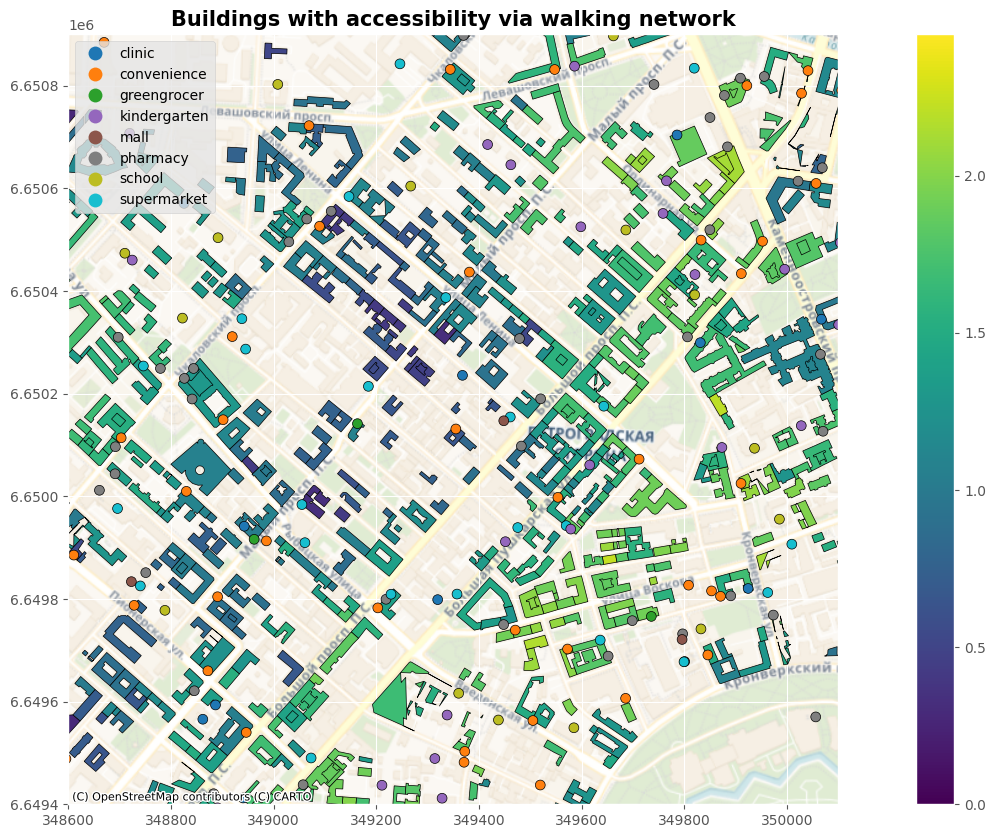

In [369]:
import contextily as cx
from matplotlib import pyplot as plt


with plt.style.context("ggplot"):
  ax = buildings_with_obj_metrics.plot(figsize=(20, 10), column='accessibility', legend=True, edgecolor='black', alpha=1)
  ax = pois.plot(ax=ax, column='pois', legend=True, markersize=50, edgecolor='black')
  plt.setp(ax, xlim=(349100-500, 349600+500), ylim=(6649900-500, 6650400+500))
  cx.add_basemap(ax=ax, crs=buildings.crs.to_string(), source=cx.providers.CartoDB.Voyager)
  ax.set_title(f'Buildings with accessibility via {network_type} network', fontsize=15, fontweight='bold')
  fp = config['dir_osm']+f'images/buildings_with_accessibility_via_{network_type}_network.png'
  plt.savefig(fp)
  logger.info(f'save buildings with accessibility to {fp}')
  plt.show()

INFO:root:save buildings with proximity to /content/drive/MyDrive/vkr/kmu/src/osm/images/buildings_with_proximity_via_walking_network.png


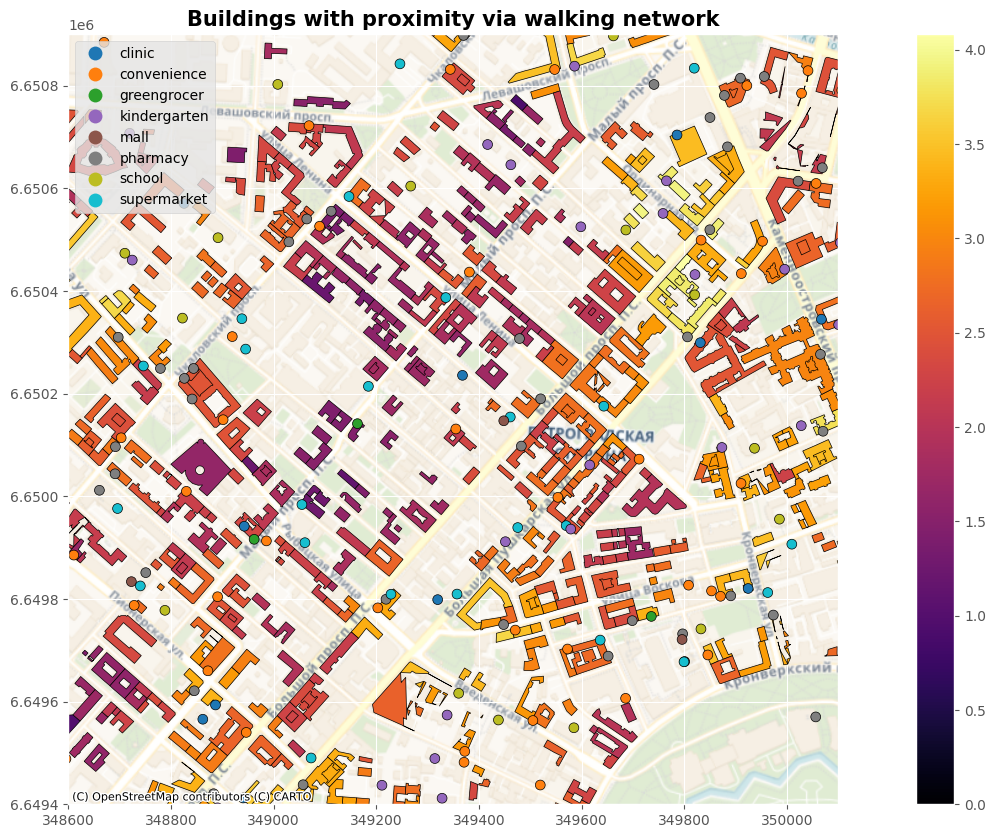

In [371]:
import contextily as cx
from matplotlib import pyplot as plt


with plt.style.context("ggplot"):
  ax = buildings_with_obj_metrics.plot(figsize=(20, 10), column='proximity', legend=True, edgecolor='black', alpha=1, cmap='inferno')
  ax = pois.plot(ax=ax, column='pois', legend=True, markersize=50, edgecolor='black')
  plt.setp(ax, xlim=(349100-500, 349600+500), ylim=(6649900-500, 6650400+500))
  cx.add_basemap(ax=ax, crs=buildings.crs.to_string(), source=cx.providers.CartoDB.Voyager)
  ax.set_title(f'Buildings with proximity via {network_type} network', fontsize=15, fontweight='bold')
  fp = config['dir_osm']+f'images/buildings_with_proximity_via_{network_type}_network.png'
  plt.savefig(fp)
  logger.info(f'save buildings with proximity to {fp}')
  plt.show()

In [374]:
fp = ''
if 'bbox' in config:
  fp = config['dir_osm'] + 'spb_bbox.gpkg'
  buildings_with_obj_metrics.to_file(fp, driver='GPKG', layer='buildings_with_objective_metrics', encoding='utf-8')
  logger.info(f'save buildings with objective metrics to {fp}')
else:
  fp = config['dir_osm'] + 'spb.gpkg'
  buildings_with_obj_metrics.to_file(fp, driver='GPKG', layer='buildings_with_objective_metrics', encoding='utf-8')
  logger.info(f'save buildings with objective metrics to {fp}')

INFO:root:save buildings with objective metrics to /content/drive/MyDrive/vkr/kmu/src/osm/spb_bbox.gpkg


In [378]:
from geopandas import read_file


buildings_from_gpkg = read_file(fp, layer='buildings_with_objective_metrics')

if buildings_with_obj_metrics.shape[0] == buildings_from_gpkg.shape[0] and buildings_with_obj_metrics.crs == buildings_from_gpkg.crs:
  logger.info(f'buildings with objective metrics successfully loaded from gpkg')

INFO:root:buildings with objective metrics successfully loaded from gpkg


In [379]:
buildings_from_gpkg.head(2)

,id,building,centroid_x,centroid_y,node_id,access_sum,k_div_access,accessibility,proximity,geometry
0,16960662,apartments,346952.030481,6.648785e+06,7177932386,0.205882,0.4,0.082353,0.695502,"POLYGON ((346938.573 6648792.461, 346950.029 6..."
1,17063465,apartments,346792.083845,6.649158e+06,5824120858,0.058824,0.2,0.011765,0.070108,"POLYGON ((346796.010 6649130.969, 346780.855 6..."
